#High dimensional semantic pointer representation with neurons

This workbook explores how well high dimensional vectors are represented in a population of neurons. Four approaches will be looked at: the 'standard' approach of linearly scaling the number of neurons (`n_neurons`) with the dimension (`d`), scaling `n_neurons` with the volume of a `d`-dimensional hypersphere, scaling the `n_neurons` by calculating the effect each neuron has on the squared error in `d`-dimensional space, and by using an ensemble array.

For each test case, the input to the ensemble population will be a `d`-dimensional semantic pointer.

<hr style='height:1px'>
Some pre-ambly bits:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nengo
from nengo.synapses import Lowpass
from nengo.networks import EnsembleArray
from nengo.spa import Vocabulary
from nengo.spa.utils import similarity

:0: FutureWarning: IPython widgets are experimental and may change in the future.


Here are the functions used to create the neuron model, and also to plot the results. For each test case, the input stimulus is shown, followed by the output of the ensemble itself. Also displayed are the norms (magnitude) of the output vector, as well as the similarity of the output vector to the provided vocabulary.

In [2]:
def make_model(d=1, scaling_func=lambda n, d: n * d, use_ensarray=False):
    vocab = Vocabulary(d)
    vocab.parse('+'.join(['A', 'B', 'C']))
    
    def stim_func(t):
        if t >= len(vocab.keys):
            return np.zeros(d)
        else:
            return vocab.parse(vocab.keys[int(t)]).v
    
    with nengo.Network() as model:
        stim = nengo.Node(output=stim_func)
        
        # Set up test ensemble
        if use_ensarray:
            model.test_rig = EnsembleArray(scaling_func(50, d), d, radius=3.5 / np.sqrt(d))
        else:
            with nengo.Network() as model.test_rig:
                ens = nengo.Ensemble(scaling_func(50, d), d)
                model.test_rig.input = ens
                model.test_rig.output = ens
        
        # Nengo nodes to calculate vector norms of the outputs of the ensemble above
        norm_node = nengo.Node(size_in=d, output=lambda t, x: np.linalg.norm(x))
    
        # Do network connections
        nengo.Connection(stim, model.test_rig.input)
        nengo.Connection(model.test_rig.output, norm_node)
        
        # Probe outputs (probe have a default synapse of 0.01)
        model.config[nengo.Probe].synapse=Lowpass(0.01)
        ps = nengo.Probe(stim)
        pe1 = nengo.Probe(model.test_rig.output)
        pn1 = nengo.Probe(norm_node)
        
    print 'N_neurons in test rig: %i' % (sum(map(lambda n: n.n_neurons, model.test_rig.all_ensembles)))
    return model, [ps, pe1, pn1], (len(vocab.keys) + 1), vocab


def plot_results(sim_data, probes, vocab):
    print 'Vector norm for zero\'d input: %0.5f' % np.mean(sim_data[probes[2]][-50:])
    
    plt.figure(figsize=(18, 4))
    ymin = min(np.min(sim_data[probes[0]]), np.min(sim_data[probes[1]])) * 1.1
    ymax = max(np.max(sim_data[probes[0]]), np.max(sim_data[probes[1]])) * 1.1

    plt.subplot(1, 4, 1)
    plt.plot(sim.trange(), sim_data[probes[0]])
    plt.ylim([ymin, ymax])
    plt.title('Input stimulus')

    plt.subplot(1, 4, 2)
    plt.plot(sim.trange(), sim_data[probes[1]])
    plt.ylim([ymin, ymax])
    plt.title('Ens output')

    plt.subplot(1, 4, 3)
    plt.plot(sim.trange(), sim_data[probes[2]])
    plt.ylim([0, 1.05])
    plt.title('Ens output norms')

    plt.subplot(1, 4, 4)
    plt.plot(sim.trange(), similarity(sim_data[probes[1]], vocab))
    plt.legend(vocab.keys)
    plt.title('Ens output similarity')

<hr style='height:3px'>
## Linear scaling of `n_neurons` with dimension

In this section, we scale the number of neurons in an ensemble with `d`. For a single dimensional ensemble, 50 neurons will be used. Consequently, a `d`-dimensional ensemble will contain $50d$ neurons. 

<hr style='height:1px'>
Dimensions = 1

N_neurons in test rig: 50
Simulation finished in 0:00:01.                                                 
Vector norm for zero'd input: 0.02764


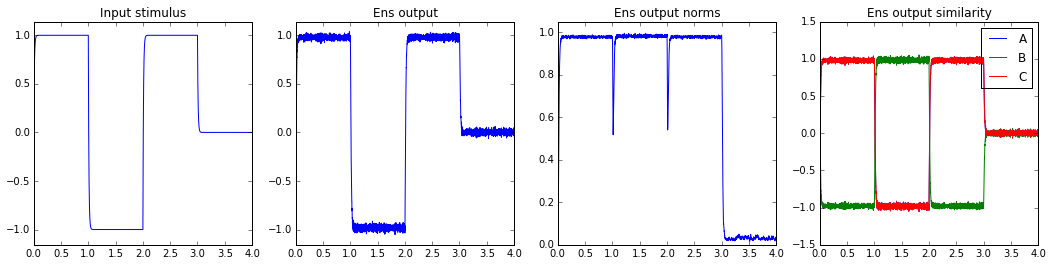

In [58]:
model, probes, runtime, vocab = make_model(1)
sim = nengo.Simulator(model)
sim.run(runtime)
plot_results(sim.data, probes, vocab)

<hr style='height:1px'>
Dimensions = 4

N_neurons in test rig: 200
Simulation finished in 0:00:01.                                                 
Vector norm for zero'd input: 0.08513


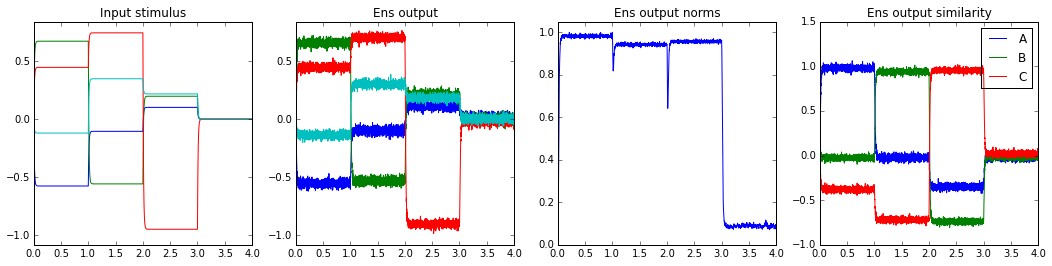

In [60]:
model, probes, runtime, vocab = make_model(4)
sim = nengo.Simulator(model)
sim.run(runtime)
plot_results(sim.data, probes, vocab)

<hr style='height:1px'>
Dimensions = 10

N_neurons in test rig: 500
Simulation finished in 0:00:02.                                                 
Vector norm for zero'd input: 0.14673


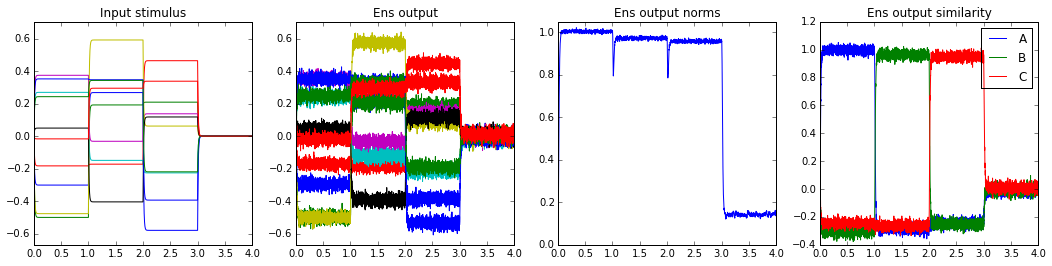

In [61]:
model, probes, runtime, vocab = make_model(10)
sim = nengo.Simulator(model)
sim.run(runtime)
plot_results(sim.data, probes, vocab)

<hr style='height:1px'>
Dimensions = 16

N_neurons in test rig: 800
Simulation finished in 0:00:04.                                                 
Vector norm for zero'd input: 0.17158


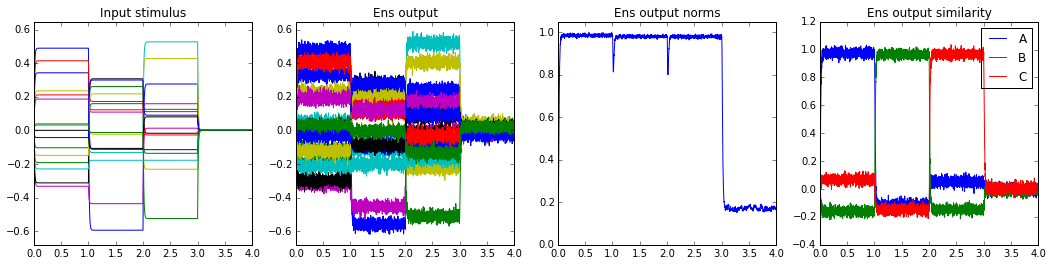

In [62]:
model, probes, runtime, vocab = make_model(16)
sim = nengo.Simulator(model)
sim.run(runtime)
plot_results(sim.data, probes, vocab)

<hr style='height:1px'>
Dimensions = 64

N_neurons in test rig: 3200
Simulation finished in 0:00:06.                                                 
Vector norm for zero'd input: 0.29728


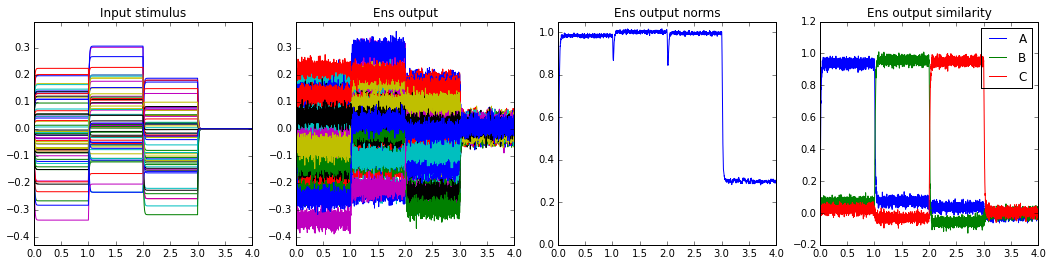

In [63]:
model, probes, runtime, vocab = make_model(64)
sim = nengo.Simulator(model)
sim.run(runtime)
plot_results(sim.data, probes, vocab)

<hr style='height:1px'>
Dimensions = 256 (Warning: Requires at least 16GB of RAM to run)

N_neurons in test rig: 12800
Simulation finished in 0:00:29.                                                 
Vector norm for zero'd input: 0.48593


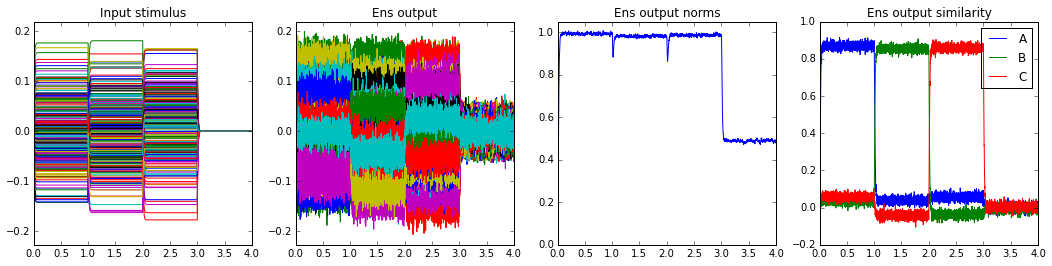

In [64]:
model, probes, runtime, vocab = make_model(256)
sim = nengo.Simulator(model)
sim.run(runtime)
plot_results(sim.data, probes, vocab)

<hr style='height:1px'>
Dimensions = 512 (Warning: Requires at least 50GB of RAM to run)

N_neurons in test rig: 25600
Simulation finished in 0:01:28.                                                 
Vector norm for zero'd input: 0.59554


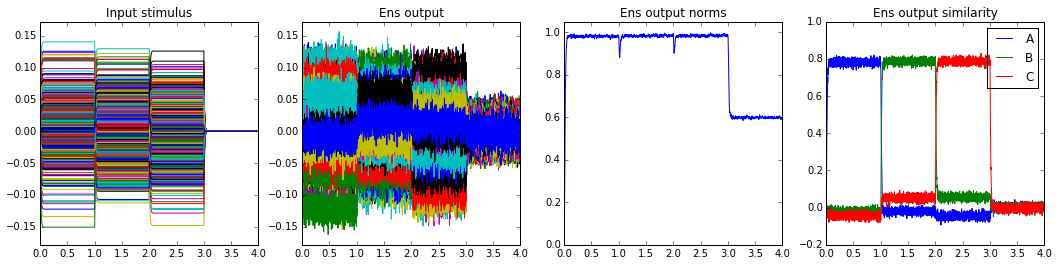

In [65]:
model, probes, runtime, vocab = make_model(512)
sim = nengo.Simulator(model)
sim.run(runtime)
plot_results(sim.data, probes, vocab)

<hr style='height:1px'>
From the results, we can see that a scaling the number of neurons results in a couple of effects:
* The norm of the output vector for a zero'd input increases as the dimensionality increases.
* The similarity of the output vector to the reference vectors decreases as dimensionality increases.

Both of these results indicate that a linear scaling is insufficent in maintaining the same amount of noise as dimensionality increase (as evident by the first observation), nor is is sufficient in maintaining the accuracy of representation (as evident by the second observation).

<hr style='height:3px'>
## Scaling n_neurons by the volume of a hypersphere

A quick search on wikipedia reveals that the volume of a hypersphere is roughly proportional to $\pi^{d/2}r^{d}$. Since $r = 1$ for all of the ensembles used in this workbook, the number of nuerons for the ensemble should be scaled by $\pi^{d/2}$.

Note that this number grows exponentially, a maximum of 256000 neurons per ensemble is imposed (this requires about 50GB of RAM to run). With this limit, the highest $d$ this workbook will explore is 10. (We can solve for this number by solving the equation: $50\pi^{d/2} = 25600$ or $d = 2\times\frac{\log(25600 / 50)}{\log(\pi)} = 10.899$.

<hr style='height:1px'>
Dimensions = 1 

N_neurons in test rig: 88
Simulation finished in 0:00:01.                                                 
Vector norm for zero'd input: 0.03030


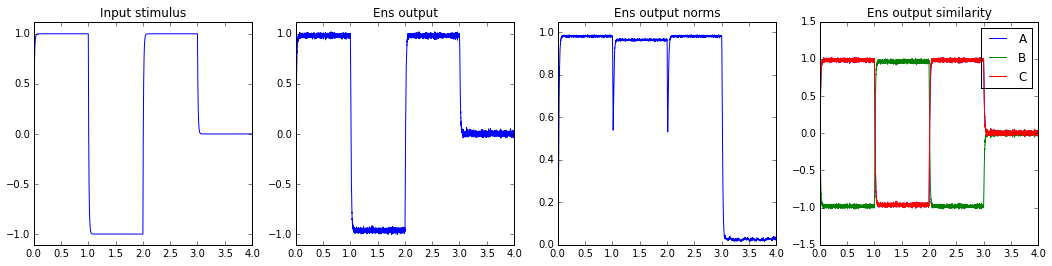

In [66]:
model, probes, runtime, vocab = \
    make_model(1, scaling_func=lambda n, d: int(n * np.pi ** (d / 2.)))
sim = nengo.Simulator(model)
sim.run(runtime)
plot_results(sim.data, probes, vocab)

<hr style='height:1px'>
Dimensions = 2 

N_neurons in test rig: 157
Simulation finished in 0:00:01.                                                 
Vector norm for zero'd input: 0.04924


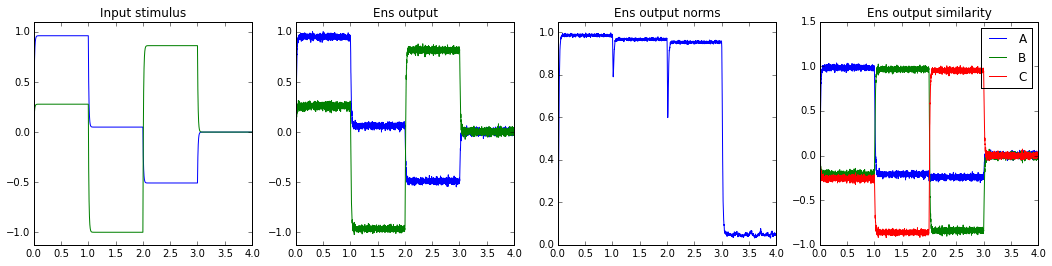

In [67]:
model, probes, runtime, vocab = \
    make_model(2, scaling_func=lambda n, d: int(n * np.pi ** (d / 2.)))
sim = nengo.Simulator(model)
sim.run(runtime)
plot_results(sim.data, probes, vocab)

<hr style='height:1px'>
Dimensions = 4 

N_neurons in test rig: 493
Simulation finished in 0:00:02.                                                 
Vector norm for zero'd input: 0.05316


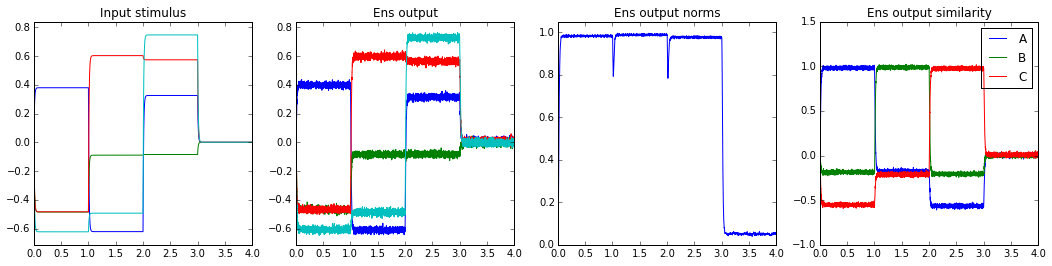

In [68]:
model, probes, runtime, vocab = \
    make_model(4, scaling_func=lambda n, d: int(n * np.pi ** (d / 2.)))
sim = nengo.Simulator(model)
sim.run(runtime)
plot_results(sim.data, probes, vocab)

<hr style='height:1px'>
Dimensions = 8

N_neurons in test rig: 4870
Simulation finished in 0:00:06.                                                 
Vector norm for zero'd input: 0.03503


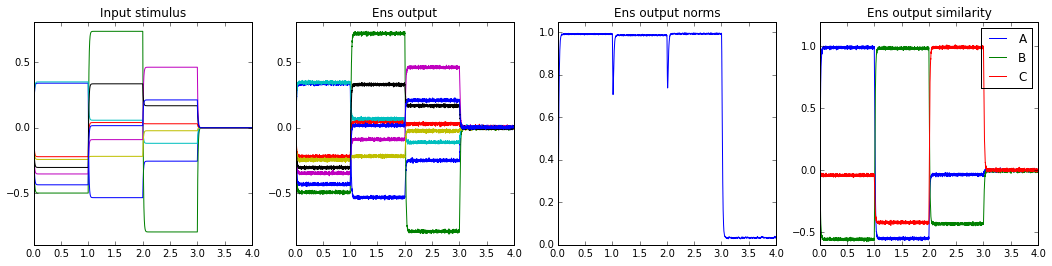

In [69]:
model, probes, runtime, vocab = \
    make_model(8, scaling_func=lambda n, d: int(n * np.pi ** (d / 2.)))
sim = nengo.Simulator(model)
sim.run(runtime)
plot_results(sim.data, probes, vocab)

<hr style='height:1px'>
Dimensions = 10 (Warning: Requires at least 20GB to run)

N_neurons in test rig: 15300
Simulation finished in 0:00:09.                                                 
Vector norm for zero'd input: 0.02279


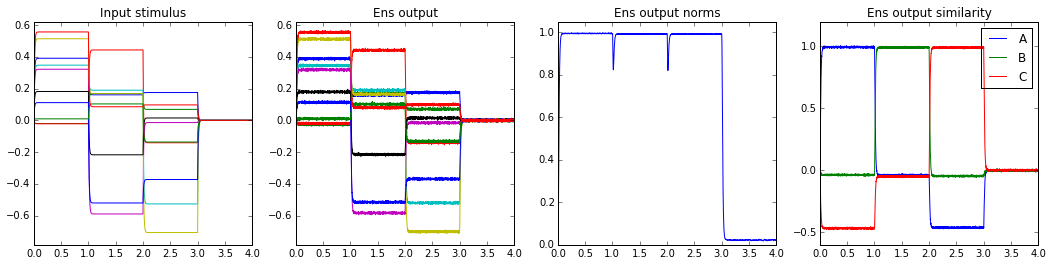

In [70]:
model, probes, runtime, vocab = \
    make_model(10, scaling_func=lambda n, d: int(n * np.pi ** (d / 2.)))
sim = nengo.Simulator(model)
sim.run(runtime)
plot_results(sim.data, probes, vocab)

<hr style='height:1px'>
As we can see, using the naive approach of scaling the number of neurons by the volume of the hypersphere does *too* good of a job, and over-estimates the number of neurons needed to maintain the same level of noise as the dimensionality increases (the output norm decreases for `d` = 8, 10).

<hr style='height:3px'>
## Scaling n_neurons by calculating the expected effect a neuron has on the squared error

Jan Gosmann (jgosmann@uwaterloo.ca) showed that to keep the squared error of a neural population the same as the dimensionality increases, the number of neurons in a high dimensional population is proportional to a ratio of beta functions:
$$N \propto d \times \frac{\mathrm{B}(\frac{d-1}{2}, \frac{1}{2})}{\mathrm{B}(1, \frac{d-1}{2})}$$

The proof of this calculation can be found here: https://drive.google.com/file/d/0B768xRkYqM96YWo3WGFkbWVTaGc/view (theorem 'Neuron number scaling').
Similar to the previous batch of runs, a cap of 25600 neurons per population will be used. In this instance, the maximum value of `d` is 54.

Note that since we need to use the beta function, we have to import it from the scipy package:

In [28]:
import scipy
from scipy.special import beta

<hr style='height:1px'>
Dimensions = 1 (Note: the beta function only works with $d > 1$.)

N_neurons in test rig: 50
Simulation finished in 0:00:01.                                                 
Vector norm for zero'd input: 0.03669


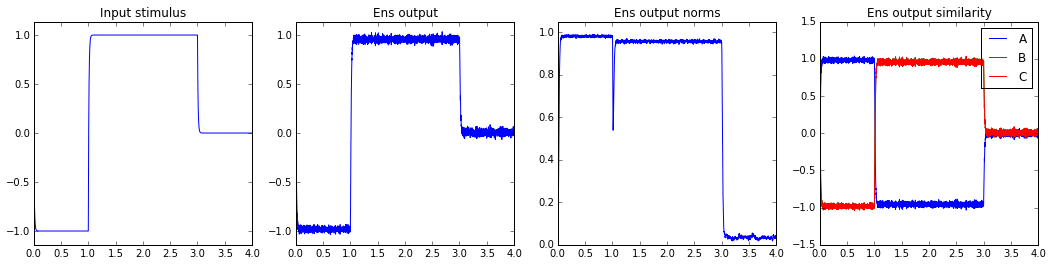

In [71]:
model, probes, runtime, vocab = make_model(1)
sim = nengo.Simulator(model)
sim.run(runtime)
plot_results(sim.data, probes, vocab)

<hr style='height:1px'>
Dimensions = 4

N_neurons in test rig: 471
Simulation finished in 0:00:01.                                                 
Vector norm for zero'd input: 0.05178


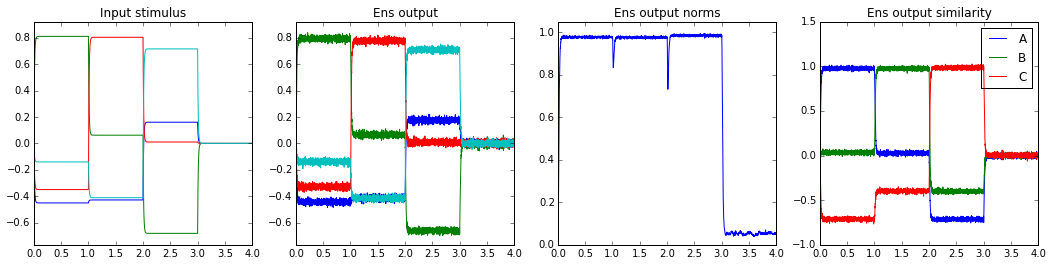

In [72]:
model, probes, runtime, vocab = \
    make_model(4, 
               scaling_func=lambda n, d: int(n * d *
                                             beta((d - 1) / 2., 0.5) /
                                             beta(1, (d - 1) / 2.)))
sim = nengo.Simulator(model)
sim.run(runtime)
plot_results(sim.data, probes, vocab)

<hr style='height:1px'>
Dimensions = 10

N_neurons in test rig: 1932
Simulation finished in 0:00:04.                                                 
Vector norm for zero'd input: 0.06384


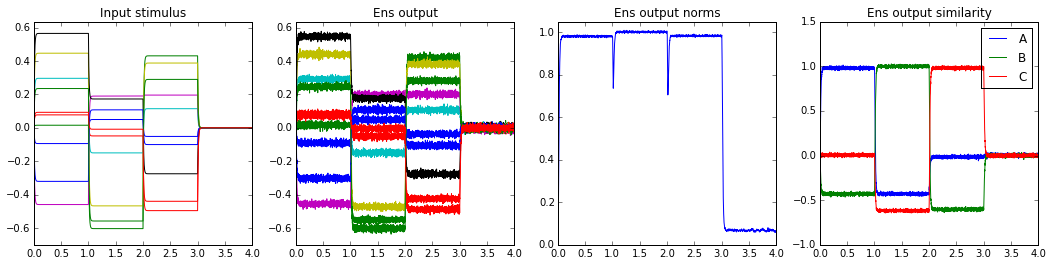

In [73]:
model, probes, runtime, vocab = \
    make_model(10, 
               scaling_func=lambda n, d: int(n * d *
                                             beta((d - 1) / 2., 0.5) /
                                             beta(1, (d - 1) / 2.)))
sim = nengo.Simulator(model)
sim.run(runtime)
plot_results(sim.data, probes, vocab)

<hr style='height:1px'>
Dimensions = 16

N_neurons in test rig: 3948
Simulation finished in 0:00:06.                                                 
Vector norm for zero'd input: 0.07723


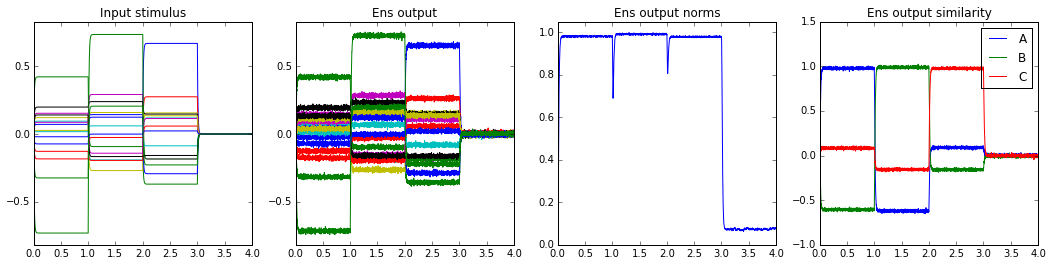

In [74]:
model, probes, runtime, vocab = \
    make_model(16, 
               scaling_func=lambda n, d: int(n * d *
                                             beta((d - 1) / 2., 0.5) /
                                             beta(1, (d - 1) / 2.)))
sim = nengo.Simulator(model)
sim.run(runtime)
plot_results(sim.data, probes, vocab)

<hr style='height:1px'>
Dimensions = 32

N_neurons in test rig: 11255
Simulation finished in 0:00:08.                                                 
Vector norm for zero'd input: 0.08222


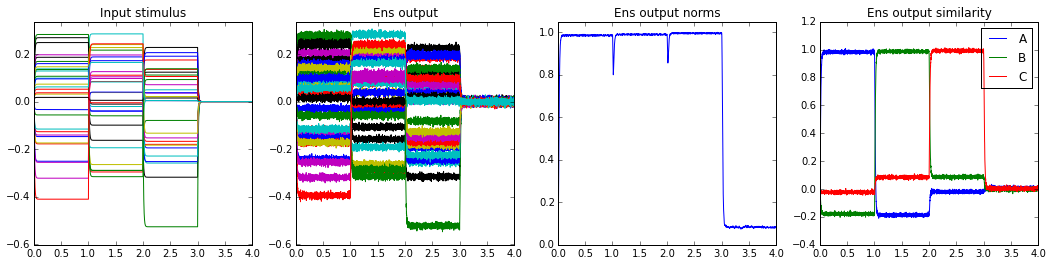

In [75]:
model, probes, runtime, vocab = \
    make_model(32, 
               scaling_func=lambda n, d: int(n * d *
                                             beta((d - 1) / 2., 0.5) /
                                             beta(1, (d - 1) / 2.)))
sim = nengo.Simulator(model)
sim.run(runtime)
plot_results(sim.data, probes, vocab)

<hr style='height:1px'>
Dimensions = 54 (Warning: Requires about 50GB of RAM to run)

N_neurons in test rig: 24751
Simulation finished in 0:00:15.                                                 
Vector norm for zero'd input: 0.09262


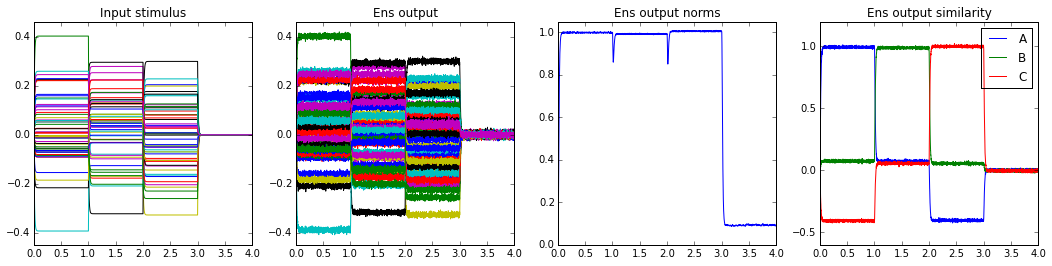

In [76]:
model, probes, runtime, vocab = \
    make_model(54, 
               scaling_func=lambda n, d: int(n * d *
                                             beta((d - 1) / 2., 0.5) /
                                             beta(1, (d - 1) / 2.)))
sim = nengo.Simulator(model)
sim.run(runtime)
plot_results(sim.data, probes, vocab)

<hr style='height:1px'>
From the results above, we see that the norm of the output vector increases a substantially slower rate when using the ratio of the beta functions. As Jan also points out, the ratio of the beta functions can be estimated by using an exponential, namely $d^{1.55}$:

In [102]:
print ' d \t  d ^ 1.55 \t  d * beta'
print '---\t-----------\t-----------'
for i in range(10):
    d = 2 ** i
    print '%3i\t%11.5f\t%11.5f' % (d, d ** 1.55, 1 if d == 1 else d * beta((d - 1) / 2., 0.5) / beta(1, (d - 1) / 2.))

 d 	  d ^ 1.55 	  d * beta
---	-----------	-----------
  1	    1.00000	    1.00000
  2	    2.92817	    3.14159
  4	    8.57419	    9.42478
  8	   25.10669	   27.48894
 16	   73.51669	   78.96933
 32	  215.26948	  225.10883
 64	  630.34594	  639.19520
128	 1845.76095	 1811.45133
256	 5404.70440	 5128.56391
512	15825.90081	14512.85387


<hr style='height:3px'>
## Using Ensemble Arrays

In the scenario where a high dimensional ensemble is not required (e.g. a high dimensional ensemble is required to compute a function involving all of said dimensions), one can use ensemble arrays instead. If the assumption that the ensemble array will be used to represent semantic pointers, the radius for each sub-ensemble in the ensemble array can be set to a value proportional to $\frac{1}{\sqrt{d}}$. In this case, the radius for each sub-ensemble is set to $\frac{3.5}{\sqrt{d}}$

<hr style='height:1px'>
Dimensions = 1

N_neurons in test rig: 50
Simulation finished in 0:00:01.                                                 
Vector norm for zero'd input: 0.12491


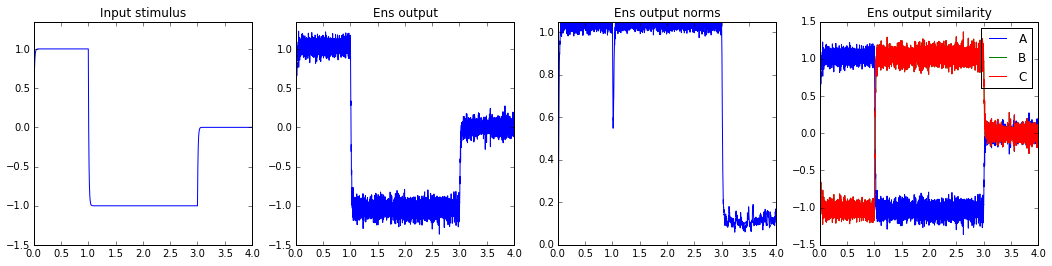

In [12]:
model, probes, runtime, vocab = make_model(1, use_ensarray=True, 
                                           scaling_func=lambda n, d: n)
sim = nengo.Simulator(model)
sim.run(runtime)
plot_results(sim.data, probes, vocab)

<hr style='height:1px'>
Dimensions = 4

N_neurons in test rig: 200
Simulation finished in 0:00:02.                                                 
Vector norm for zero'd input: 0.14522


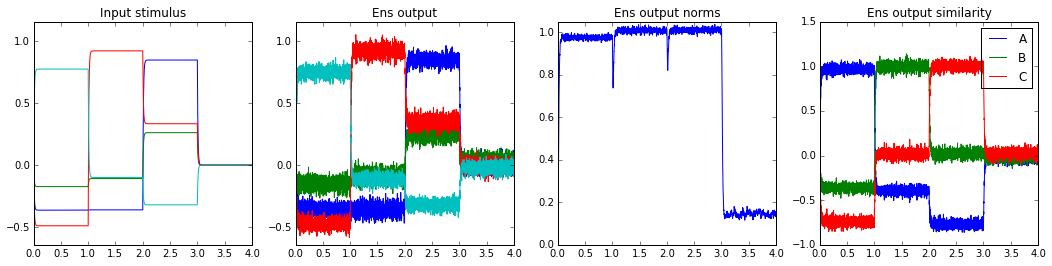

In [4]:
model, probes, runtime, vocab = make_model(4, use_ensarray=True, 
                                           scaling_func=lambda n, d: n)
sim = nengo.Simulator(model)
sim.run(runtime)
plot_results(sim.data, probes, vocab)

<hr style='height:1px'>
Dimensions = 10

N_neurons in test rig: 500
Simulation finished in 0:00:05.                                                 
Vector norm for zero'd input: 0.14752


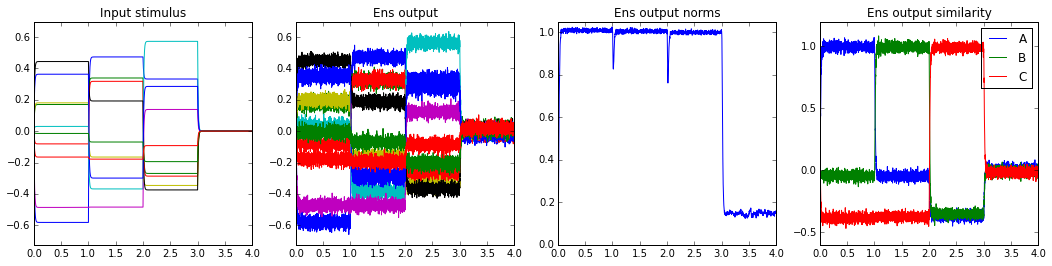

In [5]:
model, probes, runtime, vocab = make_model(10, use_ensarray=True, 
                                           scaling_func=lambda n, d: n)
sim = nengo.Simulator(model)
sim.run(runtime)
plot_results(sim.data, probes, vocab)

<hr style='height:1px'>
Dimensions = 16

N_neurons in test rig: 800
Simulation finished in 0:00:07.                                                 
Vector norm for zero'd input: 0.14698


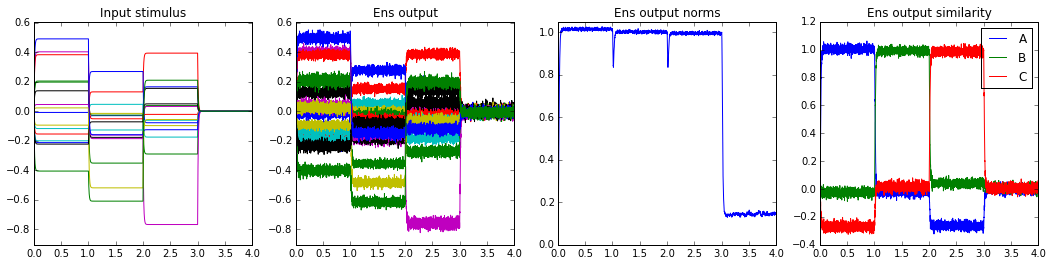

In [6]:
model, probes, runtime, vocab = make_model(16, use_ensarray=True, 
                                           scaling_func=lambda n, d: n)
sim = nengo.Simulator(model)
sim.run(runtime)
plot_results(sim.data, probes, vocab)

<hr style='height:1px'>
Dimensions = 64

N_neurons in test rig: 3200
Simulation finished in 0:00:23.                                                 
Vector norm for zero'd input: 0.15086


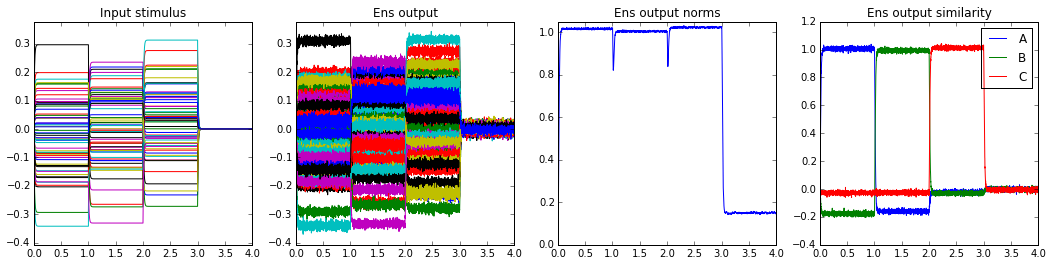

In [7]:
model, probes, runtime, vocab = make_model(64, use_ensarray=True, 
                                           scaling_func=lambda n, d: n)
sim = nengo.Simulator(model)
sim.run(runtime)
plot_results(sim.data, probes, vocab)

<hr style='height:1px'>
Dimensions = 256

N_neurons in test rig: 12800
Simulation finished in 0:01:27.                                                 
Vector norm for zero'd input: 0.15147


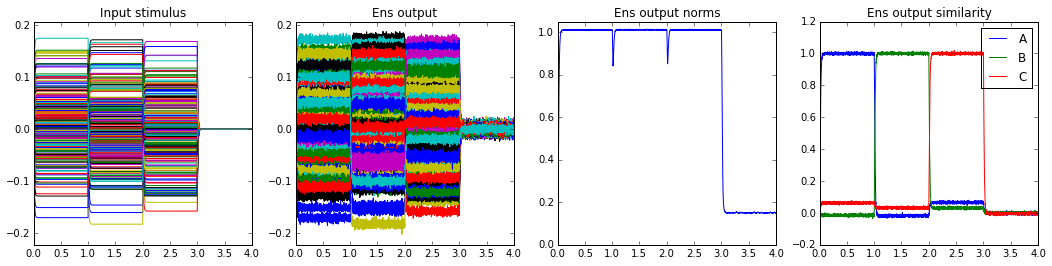

In [8]:
model, probes, runtime, vocab = make_model(256, use_ensarray=True, 
                                           scaling_func=lambda n, d: n)
sim = nengo.Simulator(model)
sim.run(runtime)
plot_results(sim.data, probes, vocab)

<hr style='height:1px'>
Dimensions = 512

N_neurons in test rig: 25600
Simulation finished in 0:02:53.                                                 
Vector norm for zero'd input: 0.14929


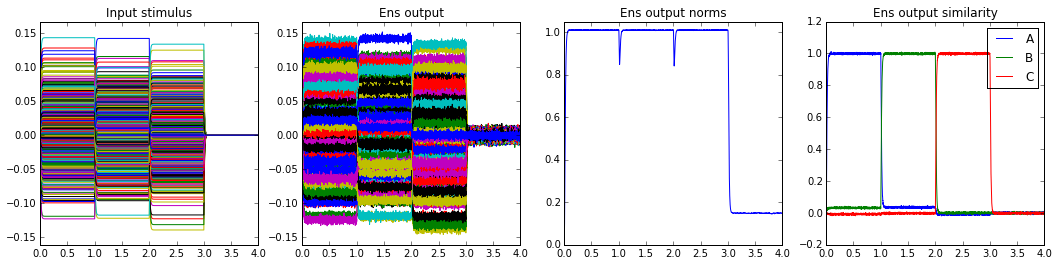

In [9]:
model, probes, runtime, vocab = make_model(512, use_ensarray=True, 
                                           scaling_func=lambda n, d: n)
sim = nengo.Simulator(model)
sim.run(runtime)
plot_results(sim.data, probes, vocab)

<hr style='height:1px'>
From the experiments above, we see that with a scaling factor of $\frac{3.5}{\sqrt{d}}$ on the radius, the squared error is a relatively constant amount regardless of the dimensionality of the ensemble array. Additionally, the total number of neurons used in the ensemble array scales linearly with the dimensionality of the semantic pointer being represented.

It should be noted that while the squared error is more than the squared error in the beta function experiments, the ensemble array approach does use a significantly fewer amount of neurons. An equivalent squared error can be achieved by doubling the number of neurons in each sub-ensemble in the ensemble array.

N_neurons in test rig: 51200
Simulation finished in 0:02:58.                                                 
Vector norm for zero'd input: 0.10098


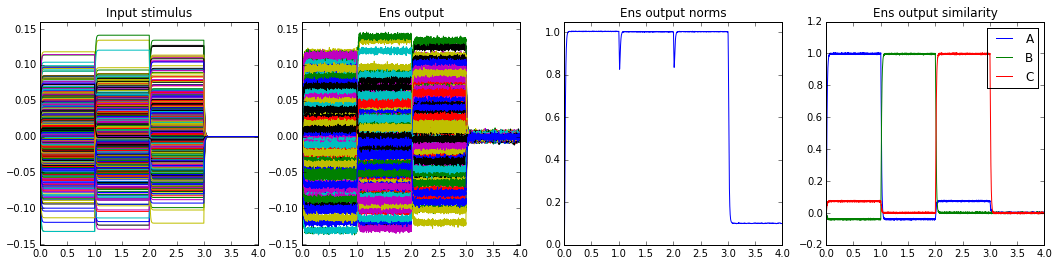

In [11]:
model, probes, runtime, vocab = make_model(512, use_ensarray=True, 
                                           scaling_func=lambda n, d: 2 * n)
sim = nengo.Simulator(model)
sim.run(runtime)
plot_results(sim.data, probes, vocab)